In [1]:
import numpy as np
import pandas as pd

## Series

- pandas의 기본 객체 중 하나
- numpy의 ndarray를 기반으로 인덱싱 기능을 추가하여 1차원 배열을 나타냄
- index를 저장하지 않을 시, 기본적으로 ndarray와 같이 0-based 인덱스 생성, 지정할 경우 명시적으로 지정된 index를 사용
- 같은 타입의 0개 이상의 데이터를 가질 수 있음

In [4]:
s1 = pd.Series([1,2,3])
s1 # left:index right:value

0    1
1    2
2    3
dtype: int64

In [5]:
s2 = pd.Series(['a','b','c'])
s2

0    a
1    b
2    c
dtype: object

In [6]:
s3 = pd.Series(np.arange(200))
s3

0        0
1        1
2        2
3        3
4        4
      ... 
195    195
196    196
197    197
198    198
199    199
Length: 200, dtype: int32

In [7]:
# data, index함께 명시하기

s4 = pd.Series([1,2,3],[100,200,300])
s4

100    1
200    2
300    3
dtype: int64

In [9]:
s5 = pd.Series([1,2,3],['a','m','k'])
s5

a    1
m    2
k    3
dtype: int64

In [11]:
# data, index, data type 함께 명시하기

s6 = pd.Series(np.arange(5), np.arange(100,105), dtype=np.int32)
s6

100    0
101    1
102    2
103    3
104    4
dtype: int32

In [12]:
s6.index

Int64Index([100, 101, 102, 103, 104], dtype='int64')

In [13]:
s6.values

array([0, 1, 2, 3, 4])

In [17]:
s6[104]

4

In [18]:
s6[104] = 70 
s6 

100     0
101     1
102     2
103     3
104    70
dtype: int32

In [19]:
# 인덱스 범위의 값이 없다면 새로 생성
s6[105] = 90
s6

100     0
101     1
102     2
103     3
104    70
105    90
dtype: int64

In [21]:
# 인덱스 재사용

s7 = pd.Series(np.arange(6), s6.index)
s7

100    0
101    1
102    2
103    3
104    4
105    5
dtype: int32

 ### Series size, shape, unique, count, value_colunts 함수
 
 - size : 개수 반환
 - shape : 튜플형태로 shape 반환
 - unique : 유일한 값만 ndarray로 반환
 - count : NaN을 제외한 개수를 반환
 - mean : NaN을 제외한 평균
 - value_counts : NaN을 제외하고 각 값들의 빈도를 반환

In [22]:
s = pd.Series([1,1,2,1,2,2,2,1,1,3,3,4,5,5,7,np.NaN])
s

0     1.0
1     1.0
2     2.0
3     1.0
4     2.0
5     2.0
6     2.0
7     1.0
8     1.0
9     3.0
10    3.0
11    4.0
12    5.0
13    5.0
14    7.0
15    NaN
dtype: float64

In [23]:
len(s)

16

In [24]:
s.size

16

In [25]:
s.shape

(16,)

In [27]:
s.unique()

array([ 1.,  2.,  3.,  4.,  5.,  7., nan])

In [28]:
s.count()

15

In [3]:
a = np.array([2,2,2,2,np.NaN])
a.mean() # numpy는 NaN값이 있으면 연산이 안됨

b = pd.Series(a)
b.mean()

nan

In [32]:
s.value_counts()

1.0    5
2.0    4
3.0    2
5.0    2
7.0    1
4.0    1
dtype: int64

In [37]:
# index를 활용하여 멀티플한 값에 접근

s[[5,7,8]].value_counts()

1.0    2
2.0    1
dtype: int64

In [40]:
# head : 상위 5개

s.head(n=7)

0    1.0
1    1.0
2    2.0
3    1.0
4    2.0
5    2.0
6    2.0
dtype: float64

In [41]:
# tail : 하위 5개

s.tail()

11    4.0
12    5.0
13    5.0
14    7.0
15    NaN
dtype: float64

## Series 데이터 연산

In [42]:
s1 = pd.Series([1,2,3,4],['a','b','c','d'])
s2 = pd.Series([6,3,2,1],['d','c','b','a'])

print(s1)
print(s2)

a    1
b    2
c    3
d    4
dtype: int64
d    6
c    3
b    2
a    1
dtype: int64


In [43]:
s1+s2

a     2
b     4
c     6
d    10
dtype: int64

### 산술연산

- Series의 경우에도 스칼라와의 연산은 각 원소별로 스칼라와의 연산이 적용
- Series와의 연산은 각 인덱스에 맞는 값끼리 연산이 적용
    - 이때, 인덱스의 pair가 맞지 않으면, 결과는 NaN

In [44]:
s1 ** 2

a     1
b     4
c     9
d    16
dtype: int64

In [45]:
s1['k'] = 7
s2['e'] = 9

In [46]:
s1 + s2

a     2.0
b     4.0
c     6.0
d    10.0
e     NaN
k     NaN
dtype: float64

### Boolean selection

- boolean Series가 []와 함께 사용되면 True 값에 해당하는 값만 새로 반환되는 Series객체에 포함됨
- 다중조건의 경우 &,| 를 사용하여 연결 가능

In [48]:
s = pd.Series(np.arange(10), np.arange(10)+1)
s

1     0
2     1
3     2
4     3
5     4
6     5
7     6
8     7
9     8
10    9
dtype: int32

In [49]:
s > 5

1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
dtype: bool

In [50]:
s[s>5]

7     6
8     7
9     8
10    9
dtype: int32

In [51]:
s[s%2==0]

1    0
3    2
5    4
7    6
9    8
dtype: int32

In [52]:
s.index > 5

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [53]:
s[s.index>5]

6     5
7     6
8     7
9     8
10    9
dtype: int32

In [56]:
s[(s>5) & (s<8)]

7    6
8    7
dtype: int32

In [58]:
(s >=7 ).sum()   # boolean sum

3

In [59]:
(s[s>=7]).sum() # 7+8+9

24

## Series 값 변경

- 추가 및 업데이터 : 인덱스를 이용
- 삭제 : drop 함수 이용

In [60]:
s = pd.Series(np.arange(100, 105),['a','b','c','d','e'])
s

a    100
b    101
c    102
d    103
e    104
dtype: int32

In [68]:
s['a'] = 200
s['k'] = 300
s

a    200
b    101
c    102
d    103
e    104
k    300
dtype: int64

In [71]:
s.drop('k', inplace=True) # inplace : 호출한 객체에 바로 삭제를 해버림

In [72]:
s

a    200
b    101
c    102
d    103
e    104
dtype: int64

In [74]:
s[['a','b']] = [300, 900]
s

a    300
b    900
c    102
d    103
e    104
dtype: int64

### Slicing

- 리스트, ndarray와 동일하게 적용

In [75]:
s1 = pd.Series(np.arange(100,105))
s1

0    100
1    101
2    102
3    103
4    104
dtype: int32

In [76]:
s1[1:3]

1    101
2    102
dtype: int32

In [82]:
s2 = pd.Series(np.arange(100, 105),['a','b','c','d','e'])
s2

a    100
b    101
c    102
d    103
e    104
dtype: int32

In [83]:
s2[1:3]

b    101
c    102
dtype: int32

In [86]:
s2['b':'d'] #마지막 index까지 포함시킴

b    101
c    102
d    103
dtype: int32

# DataFrame

- 2차원으로 인덱스가 row, column으로 구성됨
- Data Analysis, Machine Learning에서 data 변형을 위해 가장 많이 사용

In [87]:
import pandas as pd

In [88]:
train_data = pd.read_csv('./train.csv')

In [89]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### dataframe 데이터 파악하기

- shape 속성(row, column)
- describe 함수 - 숫자형 데이터의 통계치 계산
- info 함수 - 데이터 타입, 각 아이템의 개수 등 출력

In [90]:
train_data.shape

(891, 12)

In [91]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 인덱스(index)

- index 속성
- 각 아이템을 특정할 수 있는 고유의 값을 저장
- 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능

In [94]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

### Column

- 특성을 나타냄
- 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능

In [96]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## DataFrame 생성하기

- 일반적으로 분석을 위한 데이터는 다른 데이터 소스를 통해 dataframe 생성

### dictionary로 부터 생성하기

- dic의 key -> column

In [97]:
data = {'a':100, 'b':200,'c':300}

pd.DataFrame(data, index=['x','y','z'])

,a,b,c
x,100,200,300
y,100,200,300
z,100,200,300


In [99]:
data = {'a':[1,2,3], 'b':[4,5,6],'c':[10,11,12]}

pd.DataFrame(data, index=[0,1,2])

,a,b,c
0,1,4,10
1,2,5,11
2,3,6,12


### Series로 부터 생성하기

- 각 Series의 인덱스 -> column

In [102]:
a = pd.Series([100,200,300],['a','b','d'])
b = pd.Series([101,201,301],['a','b','k'])
c = pd.Series([110,210,310],['a','b','c'])

pd.DataFrame([a,b,c], index=[100,101,102])

,a,b,d,k,c
100,100.0,200.0,300.0,NaN,NaN
101,101.0,201.0,NaN,301.0,NaN
102,110.0,210.0,NaN,NaN,310.0


### csv 데이터로 부터 DataFrame 생성

- 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
- 데이터 소스로부터 추출된 csv(comma separated values)파일로부터 생성
- pandas.read_csv 함수 사용

#### read_csv 함수 파라미터

- sep - 각 데이터 값을 구별하기 위한 구분자(separator) 설정
- header - header를 무시할 경우, None 설정
- index_col - index로 사용할 column 설정
- usecols - 실제로 dataframe에 로딩할 columns만 설정

In [11]:
train_data = pd.read_csv('./train.csv', index_col='PassengerId',usecols=['PassengerId','Survived','Pclass','Name'])
train_data.head()

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"


In [105]:
train_data.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### column 선택하기

- 기본적으로 []는 column을 추출
- 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
    - 리스트를 전달할 경우 결과는 DataFrame
    - 하나의 컬럼명을 전달할 경우 결과는 Series

In [108]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [112]:
train_data[['Survived']]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [113]:
train_data[['Survived','Age','Name','Embarked']]

,Survived,Age,Name,Embarked
0,0,22.0,"Braund, Mr. Owen Harris",S
1,1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,1,26.0,"Heikkinen, Miss. Laina",S
3,1,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,0,35.0,"Allen, Mr. William Henry",S
...,...,...,...,...
886,0,27.0,"Montvila, Rev. Juozas",S
887,1,19.0,"Graham, Miss. Margaret Edith",S
888,0,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",S
889,1,26.0,"Behr, Mr. Karl Howell",C


### dataframe slicing

- dataframe의 경우 기본적으로 [] 연산자가 column 선택에 사용
- slicing은 row 레벨로 지원

In [116]:
train_data[2:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


### row 선택하기

- Series의 경우 []로 row 선택이 가능하나, DataFrame의 경우는 기본적으로 column을 선택하도록 설계
- .loc, ,iloc로 row 선택 가능
    - loc - 인덱스 자체를 사용
    - iloc - 0 based index로 사용
    - 두 함수는 ,를 사용하여 column 선택도 가능

In [117]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
train_data.index = np.arange(100,991)

In [121]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
987,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
988,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
989,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
990,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [125]:
train_data.loc[[986,989]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,NaN,S
989,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [128]:
train_data.iloc[[0,1,2]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [129]:
train_data.loc[[986,989],['Survived','Name','Sex','Age']]

,Survived,Name,Sex,Age
986,0,"Montvila, Rev. Juozas",male,27.0
989,1,"Behr, Mr. Karl Howell",male,26.0


In [130]:
train_data.iloc[[101,100,200,201],[1,4,5]]

,Survived,Sex,Age
201,0,male,NaN
200,0,female,28.0
300,0,male,28.0
301,0,male,NaN


### boolean selection으로 row 선택하기

- numpy에서 동일한 방식으로 해당 조건에 맞는 row만 선택

In [131]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 30대이면서 1등석에 탄 사람 선택하기

In [138]:
class_ = train_data['Pclass'] == 1
age_ = (train_data['Age'] >= 30.0) & (train_data['Age'] < 40.0)

train_data[class_ & age_]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


### 새 column 추가

- [] 사용하여 추가
- insert 함수 사용하여 원하는 위치에 추가

In [15]:
train_data = pd.read_csv('./train.csv')

In [17]:
train_data['Age_double'] = train_data['Age'] * 2
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


In [18]:
train_data['Age_tripple'] = train_data['Age_double'] + train_data['Age']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [19]:
train_data.insert(3, 'Fare10', train_data['Fare']/10)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


### column 삭제

- drop 함수 사용하여 삭제
    - 리스트를 사용하여 멀티플 삭제 가능

In [21]:
train_data.drop('Age_tripple', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [24]:
train_data.drop(['Age_tripple','Age_double'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double,Age_tripple
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0,66.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0,114.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0,78.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0,105.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0,105.0


In [25]:
train_data.drop(['Age_tripple','Age_double'], axis=1, inplace=True)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
train_data = pd.read_csv('./train.csv')

## 변수(column) 사이의 상관계수(correlation)

- corr 함수를 통해 상관계수 연산 (-1, 1 사이의 결과)
    - 연속성(숫자형) 데이터에 대해서만 연산
    - 인과관계를 의미하진 않음

In [30]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


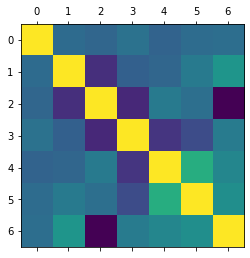

In [31]:
plt.matshow(train_data.corr())

 ### NaN 값 확인
 
 - info함수를 통해서 개수 확인
 - isna함수를 통해 boolean 타입으로 확인

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
train_data['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

### NaN 처리 방법

- 데이터에서 삭제
    - dropna 함수
- 다른 값으로 치환
    - fillna 함수

In [36]:
train_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [37]:
train_data.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
# column 삭제

train_data.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


### NaN 값 대체하기

- 평균으로 대체하기
- 생존자/사망자 별 평균으로 대체하기

In [40]:
train_data['Age'].fillna(train_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [45]:
# 생존자 나이 평균
mean1 = train_data[train_data['Survived'] == 1]['Age'].mean()

# 사망자 나이 평균
mean0 = train_data[train_data['Survived'] == 0]['Age'].mean()

mean0,mean1

(30.62617924528302, 28.343689655172415)

In [46]:
train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data[train_data['Survived'] == 0]['Age'].fillna(mean0)

0      22.000000
4      35.000000
5      30.626179
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    30.626179
890    32.000000
Name: Age, Length: 549, dtype: float64

In [47]:
train_data.loc[train_data['Survived'] == 1, 'Age'] = train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data.loc[train_data['Survived'] == 0, 'Age'] = train_data[train_data['Survived'] == 0]['Age'].fillna(mean0)

In [49]:
train_data[train_data['Age'] == 28.343689655172415]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.34369,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.34369,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.34369,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.34369,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,28.34369,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,28.34369,0,0,2677,7.2292,NaN,C
47,48,1,3,"O'Driscoll, Miss. Bridget",female,28.34369,0,0,14311,7.7500,NaN,Q
55,56,1,1,"Woolner, Mr. Hugh",male,28.34369,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,28.34369,1,1,2661,15.2458,NaN,C
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,28.34369,0,0,330932,7.7875,NaN,Q


## 숫자 데이터와 범주형 데이터 이해

### info함수로 각 변수의 데이터 타입 확인

- 타입 변경은 .astype함수를 사용

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 숫자형(Numerical Type) 데이터

- 연속성을 띄는 숫자로 이루어진 데이터
    - 예) Age, Fare 등
    

### 범주형(Categorical Type) 데이터

- 연속적이지 않은 값을 갖는 데이터를 의미
    - 예) Name, Sex, Ticket, Cabin, Embarked
- 어떤 경우, 숫자형 타입이라 할지라도 개념적으로 범주형으로 처리해야할 경우가 있음
    - 예) Pclass

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pclass 변수 변환
    
- astype 사용하여 간단히 타입만 변환

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
train_data['Pclass'] = train_data['Pclass'].astype(str)

### Age 변수 변환하기

- 변환 로직을 함수로 만든 후, apply 함수로 적용

In [66]:
import math

train_data = pd.read_csv('./train.csv')

In [67]:
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age / 10) * 10

In [68]:
train_data['Age'].apply(age_categorize)

0      20
1      30
2      20
3      30
4      30
       ..
886    20
887    10
888    -1
889    20
890    30
Name: Age, Length: 891, dtype: int64

In [69]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## One-hot encoding

- 범주형 데이터는 분석단계에서 계산이 어렵기 때문에 숫자형으로 변경이 필요함
- 범주형 데이터의 각 범주(category)를 column레벨로 변경
- 해당 범주에 해당하면 1, 아니면 0으로 채우는 인코딩 기법
- pandas.get_dummies 함수 사용
    - drop_first: 첫번째 카테고리 값은 사용하지 않음

In [70]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# drop_first -> male만 있고 female없음 
# (male 0 이면 자동으로 female 1이기 때문에) -> 나머지로 유추가능(변수 줄임)
pd.get_dummies(train_data, columns=['Pclass','Sex','Embarked'], drop_first=True)


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,1,0,0


# DataFrame groub by

- 아래의 세 단계를 적용하여 데이터를 그룹화(grouping)(SQL의 group by와 개념적으로 동일, 사용법은 유사)
    - 데이터 분할
    - operation 적용
    - 데이터 병합

In [76]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### GroupBy groups 속성

- 각 그룹과 그룹에 속한 index를 dict 형태로 표현

In [95]:
class_group = df.groupby('Pclass')
class_group

In [82]:
class_group.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [84]:
gender_group = df.groupby('Sex')
gender_group.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

### groupping 함수

- 그룹 데이터에 적용 가능한 통계 함수(NaN은 제외하여 연산)
- count - 데이터 개수
- sum - 데이터의 합
- mean, std, var - 평균, 표준편차, 분산
- min, max - 최소, 최대값


In [85]:
class_group.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [91]:
class_group.mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### 성별에 따른 생존율 구해보기

In [97]:
df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### 복수 columns로 groupping 하기

- groupby에 column 리스트를 전달
- 통계함수를 적용한 결과는 multiindex를 갖는 dataframe

In [108]:
df.groupby(['Pclass', 'Sex']).mean()['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [105]:
df.groupby(['Pclass', 'Sex']).mean().loc[[(2,'female')]]

,,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,Sex,,,,,,
2,female,443.105263,0.921053,28.722973,0.486842,0.605263,21.970121


In [101]:
# 클래스와 성별에 따른 생존율 구해보기

df.groupby(['Pclass', 'Sex']).mean().index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

### index를 이용한 group by

- index가 있는 경우, groupby 함수에 level 사용 가능
    - level은 index의 depth를 의미하며, 가장 왼쪽 0부터 증가
    
    
- set_index 함수
    - column 데이터를 index 레벨로 변경

- reset_idex 함수
    - 인덱스 초기화

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
df.set_index(['Pclass', 'Sex']).reset_index()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


In [121]:
 df.set_index('Age').groupby(level=0).mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,0.5,0.5,40.7500
70.50,117.0,0.0,3.0,0.0,0.0,7.7500
71.00,295.5,0.0,1.0,0.0,0.0,42.0792


#### 나이대별로 생존율 구하기

In [122]:
import math
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age/10) * 10

In [125]:
df.set_index('Age').groupby(age_categorize).mean()['Survived']

-1     0.293785
 0     0.612903
 10    0.401961
 20    0.350000
 30    0.437126
 40    0.382022
 50    0.416667
 60    0.315789
 70    0.000000
 80    1.000000
Name: Survived, dtype: float64

#### Multiindex를 이용한 grouping

In [131]:
df.set_index(['Pclass', 'Sex']).groupby(level=[0,1]).mean()['Age']

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

#### aggregate(집계) 함수 사용하기

- groupby 결과에 집계함수를 적용하여 그룹별 데이터 확인 가능

In [135]:
df.set_index(['Pclass', 'Sex']).groupby(level=[0,1]).aggregate([np.mean, np.sum, np.max])

PassengerId               Survived                 Age           \
                     mean     sum amax      mean sum amax       mean      sum   
Pclass Sex                                                                      
1      female  469.212766   44106  888  0.968085  91    1  34.611765  2942.00   
       male    455.729508   55599  890  0.368852  45    1  41.281386  4169.42   
2      female  443.105263   33676  881  0.921053  70    1  28.722973  2125.50   
       male    447.962963   48380  887  0.157407  17    1  30.740707  3043.33   
3      female  399.729167   57561  889  0.500000  72    1  21.750000  2218.50   
       male    455.515850  158064  891  0.135447  47    1  26.507589  6706.42   

                        SibSp               Parch                  Fare  \
               amax      mean  sum amax      mean  sum amax        mean   
Pclass Sex                                                                
1      female  63.0  0.553191   52    3  0.457447   43    2  106.125798   
       male    80.0  0.311475   38    3  0.278689   34    4   67.226127   
2      female  57.0  0.486842   37    3  0.605263   46    3   21.970121   
       male    70.0  0.342593   37    2  0.222222   24    2   19.741782   
3      female  63.0  0.895833  129    8  0.798611  115    6   16.118810   
       male    74.0  0.498559  173    8  0.224784   78    5   12.661633   

                                    
                     sum      amax  
Pclass Sex                          
1      female  9975.8250  512.3292  
       male    8201.5875  512.3292  
2      female  1669.7292   65.0000  
       male    2132.1125   73.5000  
3      female  2321.1086   69.5500  
       male    4393.5865   69.5500

## transform 함수

- groupby 후 transform 함수를 사용하면 원래의 index를 유지한 상태로 통계함수를 적용
- 전체 데이터의 집계가 아닌 각 그룹에서의 집계를 계산
- 따라서 새로 생성된 데이터를 원본 dataframe과 합치기 쉬움

In [140]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [142]:
df.groupby('Pclass').transform(np.mean)

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
3,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
4,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
...,...,...,...,...,...,...
886,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
887,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
888,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
889,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687


In [146]:
df['Age2'] = df.groupby('Pclass').transform(np.mean)['Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620


In [147]:
df.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare       Age2  
Pclass Sex                            
1      female  106.125798  38.233441  
       male     67.226127  38.233441  
2      female   21.970121  29.877630  
       male     19.741782  29.877630  
3      female   16.118810  25.140620  
       male     12.661633  25.140620

In [149]:
df['Age3'] = df.groupby(['Pclass', 'Sex']).transform(np.mean)['Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2,Age3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620,26.507589
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441,34.611765
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620,21.750000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441,34.611765
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620,26.507589


In [150]:
import numpy as np
import pandas as pd

In [157]:
df = pd.DataFrame({
    '지역' : ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기',],
    '요일' : ['월요일', '월요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량' : [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률' : [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
})

df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,월요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


### pivot

- dataframe의 형태를 변경
- 인덱스, 컬럼, 데이터로 사용할 컬럼을 명시

In [153]:
df.pivot('지역', '요일')

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [154]:
df.pivot('요일', '지역')

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

In [156]:
df.pivot('요일', '지역', '강수량')

지역,경기,부산,서울
요일,,,
금요일,100.0,NaN,100.0
목요일,50.0,NaN,50.0
수요일,100.0,NaN,1000.0
월요일,200.0,100.0,100.0
화요일,200.0,200.0,80.0


In [159]:
# 중복 허용 후 호출
df.pivot('요일', '지역')

ValueError: Index contains duplicate entries, cannot reshape

### pivot_table

- pivot과의 차이점 : 중복되는 모호한 값이 있을 경우, aggregation 함수 사용하여 값을 채움

In [160]:
pd.pivot_table(df,index='요일', columns='지역', aggfunc=np.mean)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0    90.0  10.0  30.0  75.0
화요일  200.0  200.0     NaN  20.0  20.0   NaN

In [161]:
df = pd.DataFrame({
    '지역' : ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기',],
    '요일' : ['월요일', '화요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량' : [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률' : [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
})

df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


### stack & unstack

- stack : 컬럼 레벨에서 인덱스 레벨로 dataframe 변경
    - 즉, 데이터를 쌓아올리는 개념으로 이해하면 쉬움
- unstack : 인덱스 레벨에서 컬럼 레벨로 dataframe 변경
    - stack의 반대 operation
- 둘은 역의 관계에 있음

In [163]:
new_df = df.set_index(['지역', '요일'])
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

In [165]:
new_df.unstack(0)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

In [166]:
new_df.unstack(1)

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [167]:
new_df.unstack(0).stack(0)

지역           경기     부산      서울
요일                            
금요일 강수량   100.0    NaN   100.0
    강수확률   10.0    NaN    90.0
목요일 강수량    50.0    NaN    50.0
    강수확률   50.0    NaN    50.0
수요일 강수량   100.0    NaN  1000.0
    강수확률   80.0    NaN    90.0
월요일 강수량   200.0  100.0   100.0
    강수확률   10.0   30.0    80.0
화요일 강수량   200.0  200.0    80.0
    강수확률   20.0   20.0    70.0

In [168]:
new_df.unstack(0).stack(1)

강수량  강수확률
요일  지역              
금요일 경기   100.0  10.0
    서울   100.0  90.0
목요일 경기    50.0  50.0
    서울    50.0  50.0
수요일 경기   100.0  80.0
    서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    부산   200.0  20.0
    서울    80.0  70.0

## concat 함수를 활용하여 dataframe 병합시키기

- pandas.concat 함수
- 축을 따라 dataframe을 병합 가능
    - 기본 axis = 0 -> 행단위 병합

In [170]:
# column 명이 같은 경우

df1 = pd.DataFrame({'key1' : np.arange(10), 'value1' : np.random.randn(10)})
df2 = pd.DataFrame({'key1' : np.arange(10), 'value1' : np.random.randn(10)})

In [172]:
df2

,key1,value1
0,0,-1.985586
1,1,2.361588
2,2,-1.289316
3,3,0.215248
4,4,-0.154567
5,5,0.929569
6,6,0.588969
7,7,0.756786
8,8,-1.424004
9,9,1.110610


In [174]:
pd.concat([df1, df2], ignore_index=True)

,key1,value1
0,0,-0.145836
1,1,-0.842272
2,2,1.047916
3,3,-1.024595
4,4,1.427564
5,5,-0.866587
6,6,-2.473051
7,7,-1.643831
8,8,-0.134148
9,9,0.327818


In [176]:
pd.concat([df1,df2], axis=1) # axis=0 -> 기본값 행으로 붙임 axis = 1 -> 열 레벨 붙음

,key1,value1,key1,value1
0,0,-0.145836,0,-1.985586
1,1,-0.842272,1,2.361588
2,2,1.047916,2,-1.289316
3,3,-1.024595,3,0.215248
4,4,1.427564,4,-0.154567
5,5,-0.866587,5,0.929569
6,6,-2.473051,6,0.588969
7,7,-1.643831,7,0.756786
8,8,-0.134148,8,-1.424004
9,9,0.327818,9,1.110610


In [177]:
# column 명이 다른 경우

df3 = pd.DataFrame({'key2' : np.arange(10), 'value2' : np.random.randn(10)})

In [178]:
pd.concat([df1,df3])

,key1,value1,key2,value2
0,0.0,-0.145836,NaN,NaN
1,1.0,-0.842272,NaN,NaN
2,2.0,1.047916,NaN,NaN
3,3.0,-1.024595,NaN,NaN
4,4.0,1.427564,NaN,NaN
5,5.0,-0.866587,NaN,NaN
6,6.0,-2.473051,NaN,NaN
7,7.0,-1.643831,NaN,NaN
8,8.0,-0.134148,NaN,NaN
9,9.0,0.327818,NaN,NaN


In [179]:
pd.concat([df1,df3], axis=1)

,key1,value1,key2,value2
0,0,-0.145836,0,0.495929
1,1,-0.842272,1,0.748549
2,2,1.047916,2,0.649265
3,3,-1.024595,3,-0.388130
4,4,1.427564,4,0.466339
5,5,-0.866587,5,-0.968221
6,6,-2.473051,6,-0.504312
7,7,-1.643831,7,-0.294325
8,8,-0.134148,8,0.304316
9,9,0.327818,9,1.573275


 ## dataframe merge
 
 - SQL의 join 처럼 특정한 column을 기준으로 병합
     - join 방식 : how 파라미터를 통해 명시
         - inner : 기본값, 일치하는 값이 있는 경우
         - left : left outer join
         - right : right outer join
         - outer : full outer join
 - pandas.merge 함수가 사용됨

In [180]:
customer = pd.DataFrame({'customer_id' : np.arange(6),
                        'name' : ['철수', '영희','길동','영수', '수민', '동건'],
                        '나이' : [40, 20, 21, 30, 31, 18]})
customer

,customer_id,name,나이
0,0,철수,40
1,1,영희,20
2,2,길동,21
3,3,영수,30
4,4,수민,31
5,5,동건,18


In [182]:
orders = pd.DataFrame({'customer_id' : [1,1,2,2,2,3,3,1,4,9],
                      'item' : ['치약', '칫솔', '이어폰', '헤드셋', '수건',
                               '생수', '수건', '치약', '생수', '케이스'],
                      'quantity' : [1,2,1,1,3,2,2,3,2,1]})

orders


,customer_id,item,quantity
0,1,치약,1
1,1,칫솔,2
2,2,이어폰,1
3,2,헤드셋,1
4,2,수건,3
5,3,생수,2
6,3,수건,2
7,1,치약,3
8,4,생수,2
9,9,케이스,1


#### on

- join 대상이 되는 column 명시

In [184]:
pd.merge(customer, orders, on='customer_id') ## 기본 : inner how='inner'

,customer_id,name,나이,item,quantity
0,1,영희,20,치약,1
1,1,영희,20,칫솔,2
2,1,영희,20,치약,3
3,2,길동,21,이어폰,1
4,2,길동,21,헤드셋,1
5,2,길동,21,수건,3
6,3,영수,30,생수,2
7,3,영수,30,수건,2
8,4,수민,31,생수,2


In [186]:
pd.merge(customer, orders, on='customer_id', how='left')

,customer_id,name,나이,item,quantity
0,0,철수,40,NaN,NaN
1,1,영희,20,치약,1.0
2,1,영희,20,칫솔,2.0
3,1,영희,20,치약,3.0
4,2,길동,21,이어폰,1.0
5,2,길동,21,헤드셋,1.0
6,2,길동,21,수건,3.0
7,3,영수,30,생수,2.0
8,3,영수,30,수건,2.0
9,4,수민,31,생수,2.0


In [187]:
pd.merge(customer, orders, on='customer_id', how='right')

,customer_id,name,나이,item,quantity
0,1,영희,20.0,치약,1
1,1,영희,20.0,칫솔,2
2,2,길동,21.0,이어폰,1
3,2,길동,21.0,헤드셋,1
4,2,길동,21.0,수건,3
5,3,영수,30.0,생수,2
6,3,영수,30.0,수건,2
7,1,영희,20.0,치약,3
8,4,수민,31.0,생수,2
9,9,NaN,NaN,케이스,1


In [188]:
pd.merge(customer, orders, on='customer_id', how='outer')

,customer_id,name,나이,item,quantity
0,0,철수,40.0,NaN,NaN
1,1,영희,20.0,치약,1.0
2,1,영희,20.0,칫솔,2.0
3,1,영희,20.0,치약,3.0
4,2,길동,21.0,이어폰,1.0
5,2,길동,21.0,헤드셋,1.0
6,2,길동,21.0,수건,3.0
7,3,영수,30.0,생수,2.0
8,3,영수,30.0,수건,2.0
9,4,수민,31.0,생수,2.0


- index 기준으로 join하기

In [189]:
cust1 = customer.set_index('customer_id')
order1 = orders.set_index('customer_id')

In [190]:
cust1

,name,나이
customer_id,,
0,철수,40
1,영희,20
2,길동,21
3,영수,30
4,수민,31
5,동건,18


In [191]:
order1

,item,quantity
customer_id,,
1,치약,1
1,칫솔,2
2,이어폰,1
2,헤드셋,1
2,수건,3
3,생수,2
3,수건,2
1,치약,3
4,생수,2


In [192]:
pd.merge(cust1, order1, left_index=True, right_index=True)

,name,나이,item,quantity
customer_id,,,,
1,영희,20,치약,1
1,영희,20,칫솔,2
1,영희,20,치약,3
2,길동,21,이어폰,1
2,길동,21,헤드셋,1
2,길동,21,수건,3
3,영수,30,생수,2
3,영수,30,수건,2
4,수민,31,생수,2


In [195]:
# 가장 많이 팔린 아이템

pd.merge(customer, orders, on='customer_id').groupby('item').sum().sort_values(by='quantity', ascending=False)

,customer_id,나이,quantity
item,,,
수건,5,51,5
생수,7,61,4
치약,2,40,4
칫솔,1,20,2
이어폰,2,21,1
헤드셋,2,21,1


In [198]:
# 영희가 가장 많이 구매한 아이템
pd.merge(customer, orders, on='customer_id').groupby(['name','item']).sum().loc['영희', 'quantity']

item
치약    4
칫솔    2
Name: quantity, dtype: int64

### join 함수

- 내부적으로 pandas.merge 함수 사용
- 기본적으로 index를 사용하여 left join

In [201]:
cust1.join(order1, how='inner')

,name,나이,item,quantity
customer_id,,,,
1,영희,20,치약,1
1,영희,20,칫솔,2
1,영희,20,치약,3
2,길동,21,이어폰,1
2,길동,21,헤드셋,1
2,길동,21,수건,3
3,영수,30,생수,2
3,영수,30,수건,2
4,수민,31,생수,2
